# Analyze Product Sentiment

In [1]:
import turicreate

# Read product review data

In [4]:
import os
os.getcwd()

'/mnt/c/Users/abc12/Documents/Projects/Turicreate projects/Sentiment analysis'

In [5]:
products = turicreate.SFrame('data/amazon_baby.sframe')

# Explore data

In [6]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [7]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


# Examine the reivews for the most-reviewed product

In [8]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [11]:
giraffe_reviews

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


In [12]:
len(giraffe_reviews)

785

In [13]:
giraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

## Build word count vectors

In [14]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [18]:
#remove stop words
products['word_count'] = products['word_count'].dict_trim_by_keys(turicreate.text_analytics.stop_words(), True)

In [19]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'fit':1.0, 'warmer': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0,'headaches': 1.0, 'soo': ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'break':1.0, 'recommend': 1.0, ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'barnes': 1.0, 'listed':1.0, 'shop': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'questions': 1.0,'made': 1.0, 'life': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'diaper': 1.0,'feedings': 1.0, 'tra ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'pages': 1.0, 'run':1.0, 'ordering': 1.0, ..."


# Define what is positive and negative sentiment

In [20]:
products['rating'].show()

Materializing SArray

In [21]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [22]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [23]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'fit':1.0, 'warmer': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0,'headaches': 1.0, 'soo': ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'break':1.0, 'recommend': 1.0, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'barnes': 1.0, 'listed':1.0, 'shop': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'questions': 1.0,'made': 1.0, 'life': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'diaper': 1.0,'feedings': 1.0, 'tra ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'pages': 1.0, 'run':1.0, 'ordering': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'stick':1.0, 'morning': 1.0, ...",1


In [24]:
products['sentiment'].show()

Materializing SArray

# Train our sentiment classifier

In [25]:
train_data,test_data = products.random_split(.8,seed=0)

In [26]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 56848

Number of coefficients      : 56849

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 1.433380     | 0.841549          | 0.840019            |

| 1         | 6        | 2.500000  | 1.798490     | 0.911756          | 0.890764            |

| 2         | 7        | 2.500000  | 1.997258     | 0.934514          | 0.907579            |

| 3         | 9        | 2.054917  | 2.326661     | 0.944630          | 0.912803            |

| 4         | 10       | 2.054917  | 2.519859     | 0.951457          | 0.916076            |

| 9         | 16       | 1.057820  | 3.607953     | 0.972761          | 0.906077            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [33]:
sentiment_model.coefficients

name,index,class,value,stderr
(intercept),None,1,1.4499938484107302,None
word_count,recommend,1,0.20621923068006703,None
word_count,highly,1,1.992647084670031,None
word_count,disappointed,1,-3.471425372561857,None
word_count,love,1,1.749796848055192,None
word_count,planet,1,-0.5376653991488495,None
word_count,bags,1,0.3058419906584702,None
word_count,wipes,1,0.06928269612947406,None
word_count,early,1,0.6745766958526306,None
word_count,wise,1,0.012336450781273066,None


# Apply the sentiment classifier to better understand the Giraffe reviews

In [34]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [35]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'fit':1.0, 'warmer': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0,'headaches': 1.0, 'soo': ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'break':1.0, 'recommend': 1.0, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'barnes': 1.0, 'listed':1.0, 'shop': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'questions': 1.0,'made': 1.0, 'life': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'diaper': 1.0,'feedings': 1.0, 'tra ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'pages': 1.0, 'run':1.0, 'ordering': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'stick':1.0, 'morning': 1.0, ...",1


In [36]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [37]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'easy': 1.0, 'toy': 1.0,'loves': 1.0, 'bag': ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0,'packaging': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'run': 1.0, 'lost': 1.0,'forbid': 1.0, 'loves': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'toys': 1.0, 'squeak': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0,'sophie': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'cov ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'fine': 1.0, 'dirt':1.0, 'worn': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'beware': 1.0, ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [38]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [39]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'explore': 1.0,'adventures': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'15months': 1.0,'range': 1.0, 'age': ...",1
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'worth': 1.0, 'works':1.0, 'teether': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'perfect':1.0, 'child': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'question': 1.0,'house': 1.0, 'send': ...",1
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'fade': 1.0,'amazon': 1.0, 'sophi ...",1
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'neutral': 1.0,'gender': 1.0, 'glad': ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'ve': 1.0, 'ways': 2.0,'teething': 2.0, ...",1
Vulli Sophie the GiraffeTeether ...,We just got our adorableSophie this week and ...,5.0,"{'paint': 1.0, 'rubber':1.0, 'trees': 1.0, ...",1


In [24]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,I bought it for my 8month old (I know it's ...,2.0,"{'and': 5, 'enjoy': 1,'right': 1, 'old': 1, ...",0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'and': 2, 'cute': 1,'all': 1, 'because': 1, ...",0
Vulli Sophie the GiraffeTeether ...,After getting this for mybaby and after she su ...,1.0,"{'just': 1, 'being': 1,'over': 1, 'chalked': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"My daughter loves Sophie,but we received her as a ...",2.0,"{'and': 2, 'the': 3,""don't"": 1, 'doing': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'saying': 1,'nitrosamines.': 1, ...",0
Vulli Sophie the GiraffeTeether ...,I received this in a boxset as a gift. It came ...,2.0,"{'cute': 1, 'unhooked':1, 'being': 2, 'stora ...",0
Vulli Sophie the GiraffeTeether ...,I was intrigued with theidea of Sophie the ...,2.0,"{'baby.)': 1, 'all': 2,'able': 1, 'month': 1, ...",0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'just': 1, 'may,': 1,'children': 1, 'bummed': ...",0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'expectations.': 1,'refund': 1, 'there': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'all': 1, 'just': 1,""don't"": 1, 'over': 2, ...",0


## Show the most positive reviews

In [40]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [41]:
giraffe_reviews[1]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

# Most negative reivews

In [42]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [43]:
giraffe_reviews[-2]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

# Evaluate the model

In [50]:
sentiment_model.evaluate(test_data,metric = 'roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   1e-05   | 0.8716216216216216 | 0.997605090077209  | 27976 | 5328 |
 |   2e-05   | 0.8594219219219219 | 0.9970331712896768 | 27976 | 5328 |
 |   3e-05   | 0.8489114114114115 | 0.9966757220474692 | 27976 | 5328 |
 |   4e-05   | 0.8417792792792793 | 0.9964612525021447 | 27976 | 5328 |
 |   5e-05   | 0.8355855855855856 | 0.9963540177294824 | 27976 | 5328 |
 |   6e-05   | 0.8308933933933934 | 0.9962825278810409 | 27976 | 5328 |
 |   7e-05   | 0.8258258258258259 | 0.9961038032599371 | 27976 | 5328 |
 |   8e-05   | 0.8228228228228228 | 0.9959965684872748 | 27976 | 5328 |
 |   9e-05   | 0.8188813813813

In [52]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9060773480662984,
 'auc': 0.9136966210473427,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1691 |
 |      1       |        0        |  1437 |
 |      0       |        0        |  3637 |
 |      1       |        1        | 26539 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9443475785503328,
 'log_loss': 0.3884642154181895,
 'precision': 0.9400991852639037,
 'recall': 0.948634543894767,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

In [53]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

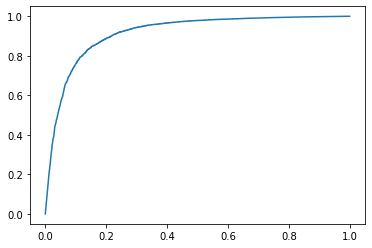

In [54]:
import matplotlib.pyplot as plt

plt.plot(sentiment_model.validation_roc_curve['fpr'], sentiment_model.validation_roc_curve['tpr'])

In [61]:
products['word_count'][1].get('quilt')

1.0

In [ ]:
def get_word_count(frame,word):
    